In [ ]:
!mkdir /root/.kaggle
!echo '{"username":"addisonmorgan","key":"c065aaee0f5e07e0b5ee238d05d90e86"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d grassknoted/asl-alphabet
!unzip asl-alphabet.zip >/dev/null
!pip install pyyaml h5py

 98% 1.01G/1.03G [00:11<00:00, 65.4MB/s]
100% 1.03G/1.03G [00:11<00:00, 96.8MB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

2.9.2


In [ ]:
train_dir = "/content/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"

IMSIZE = 64

In [ ]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            # img = cv2.cvtColor(cv2.imread(data_dir + '/' + dir_list[i] + '/' + image), cv2.COLOR_BGR2GRAY)
            img = cv2.cvtColor(cv2.imread(data_dir + '/' + dir_list[i] + '/' + image), cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMSIZE, IMSIZE))
            # images.append(img[:, :, None])
            # images.append(img[None, :, :, :])
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of M ...
Obtaining images of Q ...
Obtaining images of E ...
Obtaining images of L ...
Obtaining images of C ...
Obtaining images of F ...
Obtaining images of B ...
Obtaining images of S ...
Obtaining images of space ...
Obtaining images of U ...
Obtaining images of Y ...
Obtaining images of T ...
Obtaining images of D ...
Obtaining images of N ...
Obtaining images of H ...
Obtaining images of W ...
Obtaining images of nothing ...
Obtaining images of O ...
Obtaining images of del ...
Obtaining images of A ...
Obtaining images of V ...
Obtaining images of J ...
Obtaining images of R ...
Obtaining images of P ...
Obtaining images of X ...
Obtaining images of Z ...
Obtaining images of G ...
Obtaining images of I ...
Obtaining images of K ...


In [ ]:
classes_List = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [ ]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    np_X = []
    
    label_encoded_y = utils.to_categorical(y)
    X = []
    y = []
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    normalized_X = []
    label_encoded_y = []
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)
X = []
y = []


In [ ]:
classes = 29
batch = 64
epochs = 15
learning_rate = 0.001

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMSIZE, IMSIZE, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(IMSIZE, IMSIZE, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(IMSIZE, IMSIZE, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))


adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15
979/979 [==============================] - 38s 28ms/step - loss: 0.8051 - accuracy: 0.7786 - val_loss: 3.3557 - val_accuracy: 0.5710
Epoch 2/15
979/979 [==============================] - 26s 27ms/step - loss: 0.1336 - accuracy: 0.9584 - val_loss: 1.1521 - val_accuracy: 0.7570
Epoch 3/15
979/979 [==============================] - 27s 27ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 1.2363 - val_accuracy: 0.7693
Epoch 4/15
979/979 [==============================] - 26s 27ms/step - loss: 0.0870 - accuracy: 0.9778 - val_loss: 0.2599 - val_accuracy: 0.9314
Epoch 5/15
979/979 [==============================] - 26s 26ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.2424 - val_accuracy: 0.9360
Epoch 6/15
979/979 [==============================] - 27s 27ms/step - loss: 0.0653 - accuracy: 0.9855 - val_loss: 1.4102 - val_accuracy: 0.8128
Epoch 7/15
979/979 [==============================] - 27s 27ms/step - loss: 0.0350 - accuracy: 0.9916 - val_loss: 0.0327 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 2s 6ms/step - loss: 0.1214 - accuracy: 0.9843
Test accuracy: 0.9842528700828552
Test loss: 0.12138509005308151


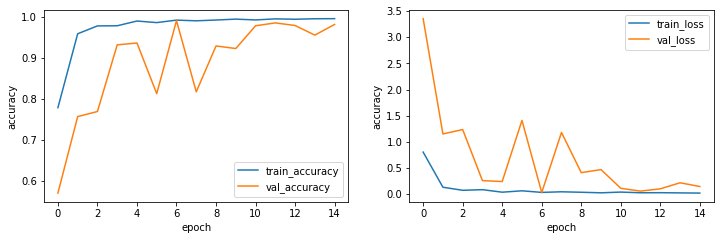

In [ ]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [ ]:
model.save("model.h5")

In [ ]:
from google.colab import files
# files.upload()
# files.download("/content/model.h5")

In [ ]:
# model = tf.keras.models.load_model('/content/hands.h5')
# loss, acc = model.evaluate(x_test, y_test)
# print(loss, acc)

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import html
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

def jsob_to_image(js_object):
  # decode base64 image
  image_bytes = b64decode(js_object.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR 
  frame = cv2.imdecode(img_array, flags=1)

  return frame

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame():
  data = eval_js('stream_frame()')
  return data

<IPython.core.display.Javascript object>

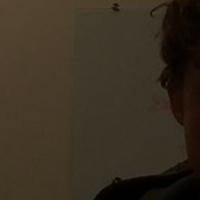

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]], shape=(1, 29), dtype=float32)
[[0 5]]
F


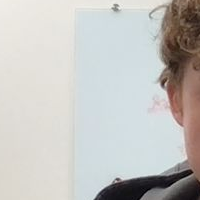

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]], shape=(1, 29), dtype=float32)
[[0 5]]
F


In [ ]:
video_stream()
from google.colab.patches import cv2_imshow

while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # get center 200x200 image, then resize so its like the data
    # h: 480
    # w: 640
    # should be h -> 140:341 ?
    #           w -> 220:421 ?  1 for the exclusive part
    # img = img[140:340, 220:420, :]
    img = img[140:340, 220:420, :]
    # img = img[140:340, 220:420, None] #b and w    
    # should be good, just put hand in middle of screen and it should work now?
    cv2_imshow(img)
    img_small = cv2.resize(img, (IMSIZE, IMSIZE))
    img_new = np.expand_dims(img_small, axis=0)
    saved = model(img_new)
    print(saved)
    index = tf.where(saved).numpy()
    print(index)
    print(classes_List[index[0][1]])
